Produces two plots:
  - `figtrain`: Figure showing training paradigm and sanity test
  - `figtest`: Figure showing result on two test inputs

In [1]:
from etc.init import *
import etc.figureslib as lib

import NotebookScripter
from NotebookScripter import run_notebook, receive_parameter
NotebookScripter.set_notebook_option(with_matplotlib_backend=None)
savefig = receive_parameter(savefig=False)
saveext = receive_parameter(saveext='pdf')
try:
    data
except NameError:
    data = receive_parameter(data=None)

if data is None:
    data = run_notebook("Figures_load_data.ipynb")
records = data.records

[monochrome_palette]: value was greater than 1 and was clipped.



import copy
import os.path
import itertools
from collections import Iterable, OrderedDict, namedtuple, deque
import numpy as np
import scipy as sp
import scipy.stats
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.image
from matplotlib.gridspec import GridSpec
import pymc3 as pymc
import pandas as pd
from pandas import DataFrame
from parameters import ParameterSet

from importlib import reload

import theano_shim as shim

import mackelab as ml
import mackelab.smttk as smttk
import mackelab.iotools
import mackelab.pymc3
import mackelab.parameters
import mackelab.plot
ml.parameters.Transform.namespaces['shim'] = shim

import sinn
import sinn.histories as histories
import sinn.models
from sinn.optimize.gradient_descent import FitCollection
import sinn.analyze as anlz
from sinn.analyze.axisdata import LogLikelihood, Likelihood, Probability
from sinn.analyze.axis import Axis

import fsGIF.core as core
import fsGIF.fsgif_model as fsgif_model
from fsGIF.fsgif_model

In [2]:
mplconfig = run_notebook("Figures_matplotlib_config.ipynb")
inject_vars(mplconfig, globals())

# Loading and common setup

For extraction of the parameters from the collection of fits, see bottom of notebook.

In [3]:
popnames = ['L2/3e', 'L2/3i', 'L4e', 'L4i']

In [4]:
# Sets order in table and suppl. figure
table_vars = ['w', 'τ_m', 'c', 'Δu', 'τ_s', 'J_θ', 'τ_θ']
#varstrings = ['${}$'.format(v) for v in table_vars]

In [5]:
result_seeds = np.arange(300,400)
truemicro_seeds = np.arange(1300,1400)
truemeso_seeds = np.arange(2300,2400)
use_expected_activity = False
num_ref_records = 50
dt = 0.01

In [6]:
records.filter.after(2020).summary

,# records,reason,outcome,tags,main_file,avg . duration
20200302-021305,8,sgd_test_R,,,../code/fsGIF/gradient_descent.py,5h 22m 15s
20200229-013019,20,sgd_test_cstI,,,../code/fsGIF/gradient_descent.py,5h 09m 27s
20200227-202456,19,sgd_test_unclamped_ur,,,../code/fsGIF/gradient_descent.py,5h 19m 22s
20200209-131303,100,fig5_stepI_true-meso,,,../code/fsGIF/generate_activity.py,1h 46m 33s
20200209-131210,100,fig5_stepI_true-micro,,,../code/fsGIF/generate_spikes.py,3h 37m 56s
20200207-120342,32,fig5_stepI_true-meso,,,../code/fsGIF/generate_activity.py,1h 30m 03s
20200207-114536,100,fig8_OU-I_inferred-meso,,,../code/fsGIF/generate_activity.py,1h 27m 39s
20200207-114448,100,fig8_OU-I_true-meso,,,../code/fsGIF/generate_activity.py,1h 26m 43s
20200207-114438,100,fig8_rampI_inferred-meso,,,../code/fsGIF/generate_activity.py,1h 33m 22s
20200207-114425,100,fig8_rampI_true-meso,,,../code/fsGIF/generate_activity.py,1h 47m 30s


In [7]:
records.filter.script('gradient').filter.any.reason(['4pop', '4_pop']).summary.head(4)

,# records,reason,outcome,tags,main_file,avg . duration
20190612-125539,510,More_4_pop_fits_because_plots_are_not_good_enough,,,../code/fsGIF/gradient_descent.py,9h 03m 11s
20181113-091205,82,sgd_4pop_100-more-fits,,,fsGIF/fsGIF/gradient_descent.py,9h 15m 36s
20181030-164336,21,sgd_sine-wn_4pop,,,fsGIF/fsGIF/gradient_descent.py,16h 16m 22s
20181030-155623,7,sgd_sine-wn_4pop,,,fsGIF/fsGIF/gradient_descent.py,0h 25m 53s


In [8]:
#records.filter.reason('λbar_true-params').summary.head(5)
records.filter.any.reason(('fig7', 'fig8')).summary

,# records,reason,outcome,tags,main_file,avg . duration
20200207-114536,100,fig8_OU-I_inferred-meso,,,../code/fsGIF/generate_activity.py,1h 27m 39s
20200207-114448,100,fig8_OU-I_true-meso,,,../code/fsGIF/generate_activity.py,1h 26m 43s
20200207-114438,100,fig8_rampI_inferred-meso,,,../code/fsGIF/generate_activity.py,1h 33m 22s
20200207-114425,100,fig8_rampI_true-meso,,,../code/fsGIF/generate_activity.py,1h 47m 30s
20200204-114454,89,fig7_trainI_inferred-meso,,,../code/fsGIF/generate_activity.py,1h 27m 56s
20200204-114226,63,fig7_trainI_true-meso,,,../code/fsGIF/generate_activity.py,1h 09m 29s
20200127-111900,100,fig8_rampI_true-micro,,,../code/fsGIF/generate_spikes.py,7h 09m 57s
20200127-111754,100,fig8_rampI_true-meso,,,../code/fsGIF/generate_activity.py,1h 17m 04s
20200127-111650,100,fig8_rampI_inferred-meso,,,../code/fsGIF/generate_activity.py,1h 06m 50s
20200127-105335,100,fig8_OU-I_true-micro,,,../code/fsGIF/generate_spikes.py,7h 06m 56s


In [9]:
records.filter.reason('posterior-activity_4pops').summary.head(5)

,# records,reason,outcome,tags,main_file,avg . duration
20190724-111120,4,posterior-activity_4pops,,,../code/fsGIF/generate_activity.py,0h 17m 35s
20190710-214428,1,posterior-activity_4pops,,,../code/fsGIF/generate_activity.py,0h 15m 48s
20190709-135325,1,posterior-activity_4pops,,,../code/fsGIF/generate_activity.py,0h 20m 17s
20190705-111650,1,posterior-activity_4pops,,,../code/fsGIF/generate_activity.py,0h 12m 48s
20190703-131604,1,posterior-activity_4pops,,,../code/fsGIF/generate_activity.py,0h 14m 20s


Reminders

  - `'input_ramp-spikes_4pop.params'`: test input
  - `'meso-gt'`: mesoscopic simulation with ground truth parameters

In [10]:
psets = lib.AxAttrs(
    train_inferred_meso = records.filter.label('20200127-104121').earliest.parameters,
    train_true_meso = records.filter.label('20200127-104210').earliest.parameters,
    train_true_micro = records.filter.label('20200127-104743').earliest.parameters,
    OU_inferred_meso = records.filter.label('20200127-105008').earliest.parameters,
    OU_true_meso = records.filter.label('20200127-105138').earliest.parameters,
    OU_true_micro = records.filter.label('20200127-105335').earliest.parameters,
    ramp_inferred_meso = records.filter.label('20200127-111650').earliest.parameters,
    ramp_true_meso = records.filter.label('20200127-111754').earliest.parameters,
    ramp_true_micro = records.filter.label('20200127-111900').earliest.parameters,
)
for k, pset in psets.items():
    psets[k] = psets[k].copy()
    del psets[k]['seed']

The 'train_inferred_meso' runs were contaminated by 4 which had a different parameter set.
So to be absolutely sure that runs are consistent, instead of matching labels, we match parameters

    train_inferred_meso_records = records.filter.any.label(['20200127-104121', '20200204-114454']).list
    train_true_meso_records = records.filter.any.label(['20200127-104210', '20200204-114226']).list
    train_true_micro_records = records.filter.label('20200127-104743').list
    OU_inferred_meso_records = records.filter.label('20200127-105008').list
    OU_true_meso_records = records.filter.label('20200127-105138').list
    OU_true_micro_records = records.filter.label('20200127-105335').list
    ramp_inferred_meso_records = records.filter.label('20200127-111650').list
    ramp_true_meso_records = records.filter.label('20200127-111754').list
    ramp_true_micro_records = records.filter.label('20200127-111900').list

In [11]:
simrecords = lib.AxAttrs({k: lib.RecordSet(records.filter.after(20200127).filter.parameters(pset).list)
                         for k, pset in psets.items()})
# We use RecordSet here because it remove duplicate records as well as invalid ones
# (e.g. those that failed to save their data)

In [12]:
def count_recs(simrecords):
    return pd.DataFrame(
        {k: {"# records": len(rs),
             "# distinct records": len(set(ml.parameters.digest(rec.parameters)
                                       for rec in rs))
            }
          for k, rs in simrecords.items()})
count_recs(simrecords)

,train_inferred_meso,train_true_meso,train_true_micro,OU_inferred_meso,OU_true_meso,OU_true_micro,ramp_inferred_meso,ramp_true_meso,ramp_true_micro
# distinct records,85,63,61,93,94,61,88,77,61
# records,85,63,61,93,94,61,88,77,61


In [13]:
for rs in simrecords.values():
    rs.remove_duplicates()
count_recs(simrecords)

,train_inferred_meso,train_true_meso,train_true_micro,OU_inferred_meso,OU_true_meso,OU_true_micro,ramp_inferred_meso,ramp_true_meso,ramp_true_micro
# distinct records,85,63,61,93,94,61,88,77,61
# records,85,63,61,93,94,61,88,77,61


In [14]:
trainsimrecords = lib.AxAttrs({k:v for k,v in simrecords.items() if 'train' in k})
OUsimrecords = lib.AxAttrs({k:v for k,v in simrecords.items() if 'OU' in k})
rampsimrecords = lib.AxAttrs({k:v for k,v in simrecords.items() if 'ramp' in k})

In [15]:
trainsimrecords.true_micro = simrecords.train_true_micro
OUsimrecords.true_micro = simrecords.OU_true_micro
rampsimrecords.true_micro = simrecords.ramp_true_micro

In [16]:
# Split the true_micro sims into sim and reference sets
for _simrecords in [trainsimrecords, OUsimrecords, rampsimrecords]:
    assert 'true_all' not in _simrecords
    N = count_recs(_simrecords).min(axis=1)[0]
    rl = _simrecords.true_micro.recordlist
    i = int(len(rl)/2)
    true, ref = rl[:i], rl[i:]
    _simrecords.true_all = _simrecords.true_micro
    _simrecords.true_micro = lib.RecordSet(true)
    _simrecords.true_ref = lib.RecordSet(ref)
    
    for rs in _simrecords.values():
        labels = sorted(rs.records)
        rs.remove(labels[N:])

In [17]:
count_recs(simrecords)

,train_inferred_meso,train_true_meso,train_true_micro,OU_inferred_meso,OU_true_meso,OU_true_micro,ramp_inferred_meso,ramp_true_meso,ramp_true_micro
# distinct records,61,61,61,61,61,61,61,61,61
# records,61,61,61,61,61,61,61,61,61


In [18]:
train_inferred_meso_records = simrecords.train_inferred_meso.recordlist
train_true_meso_records = simrecords.train_true_meso.recordlist
train_true_micro_records = simrecords.train_true_micro.recordlist
OU_inferred_meso_records = simrecords.OU_inferred_meso.recordlist
OU_true_meso_records = simrecords.OU_true_meso.recordlist
OU_true_micro_records = simrecords.OU_true_micro.recordlist
ramp_inferred_meso_records = simrecords.ramp_inferred_meso.recordlist
ramp_true_meso_records = simrecords.ramp_true_meso.recordlist
ramp_true_micro_records = simrecords.ramp_true_micro.recordlist

In [19]:
test_Iparams = records.get('20181112-235654').parameters 

In [20]:
#OUtest_Iparams = records.get('20190627-163948').parameters # old OU input, with more E
OUtest_Iparams = records.get('20190704-141607').parameters

In [21]:
#easyOUtest_Iparams = records.get('20190708-092426').parameters

train_inferred_meso_traces = load_traces(train_inferred_meso_records)

train_true_meso_traces = load_traces(train_true_meso_records)

#train_trueref_micro_traces = load_traces(train_true_micro_records[:num_ref_records])
#train_truetest_micro_traces = load_traces(train_true_micro_records[num_ref_records:])
train_trueref_micro_traces = load_traces(train_true_micro_records)
train_truetest_micro_traces = load_traces(train_true_micro_records)

In [24]:
#n = int(len(train_true_micro_records)/2)
trainsims = lib.SimStatsColl(timelim = (10., 19.5), dt=dt,
                         ref_sims = trainsimrecords.true_ref.recordlist,
                         true     = trainsimrecords.true_micro.recordlist,
                         true_all = trainsimrecords.true_all.recordlist,
                         mesogt   = train_true_meso_records,
                         map      = train_inferred_meso_records,
                         )

100%|██████████| 61/61 [00:07<00:00,  7.76it/s]


In [25]:
OUsims    = lib.SimStatsColl(timelim = (10., 19.5), dt=dt,
                         ref_sims = OUsimrecords.true_ref.recordlist,
                         true     = OUsimrecords.true_micro.recordlist,
                         true_all = OUsimrecords.true_all.recordlist,
                         mesogt   = OU_true_meso_records,
                         map      = OU_inferred_meso_records)

100%|██████████| 61/61 [00:07<00:00,  8.67it/s]


In [26]:
rampsims  = lib.SimStatsColl(timelim = (10., 19.5), dt=dt,
                         ref_sims = rampsimrecords.true_ref.recordlist,
                         true     = rampsimrecords.true_micro.recordlist,
                         true_all = rampsimrecords.true_all.recordlist,
                         mesogt   = ramp_true_meso_records,
                         map      = ramp_inferred_meso_records)

100%|██████████| 61/61 [00:06<00:00,  8.76it/s]


In [27]:
easyOUsims = lib.SimStatsColl([])

**NOTE**: Figure below used will be lost if rerun: we no longer save all rms values

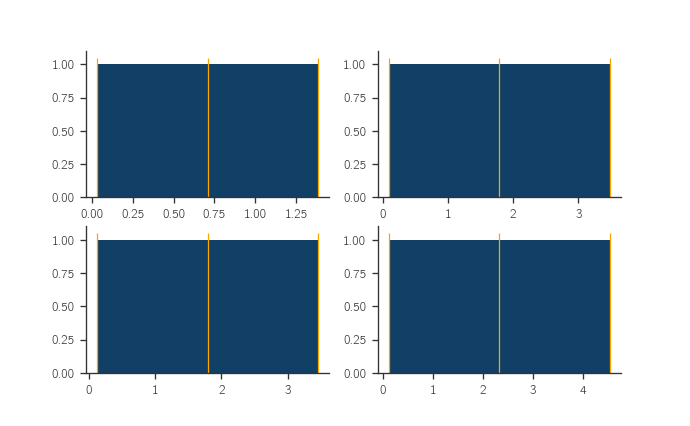

In [28]:
fig, axes = plt.subplots(2,2)
for ax, D in zip(axes.flat, trainsims.map.rms):
    ax.hist(D, bins='auto')
    m = (D.max() + D.min())/2
    Δ = (D.max() - D.min())/2
    ax.vlines([m, m-Δ, m+Δ], *ax.get_ylim(), colors='orange')

fitcolls = {
    'map': lib.FitCollView(
        list(fitrecords.filter.script('gradient_descent')
                              .extract("parameters", "outputpath")))
}

rampsims = lib.FitResultSims(fitcolls,
                             input_params = test_Iparams,
                             start = 10.,  stop = 19., seed=300)

OUsims = lib.FitResultSims(fitcolls,
                           input_params = OUtest_Iparams,
                           start = 10.,  stop = 19., seed=300)

trainsims = lib.FitResultSims(fitcolls,
                              input_params = fitcolls['map'].parameters.posterior.input.params,
                              start = 10., stop = 19., seed=300)  # seed=314

gtparams = ParameterSet("params/activity-4pop.params", basepath='/home/alex/Recherche/macke_lab/run/fsGIF')
    # TODO: use core.param_dir

gtparams.input.params = test_Iparams
gtparams.spikes.input.params = test_Iparams

rampsims.add_sim('meso-gt', gtparams)

gtparams.input.params = OUtest_Iparams
gtparams.spikes.input.params = OUtest_Iparams

OUsims.add_sim('meso-gt', gtparams)

gtparams.input.params = fitcolls['map'].parameters.posterior.input.params
gtparams.spikes.input = gtparams.input

trainsims.add_sim('meso-gt', gtparams)

## Compute ρ-bar and RMSE-bar

In [29]:
trainbarstats = lib.BarStats(
    reftraces = trainsims.ref_sims.traces,
    **{k: sims.traces.traces for k, sims in trainsims.test_sims.items()})

OUbarstats = lib.BarStats(
    reftraces = OUsims.ref_sims.traces,
    **{k: sims.traces.traces for k, sims in OUsims.test_sims.items()})

rampbarstats = lib.BarStats(
    reftraces = rampsims.ref_sims.traces,
    **{k: sims.traces.traces for k, sims in rampsims.test_sims.items()})

# Fig training

In [30]:
outputname = "Fig7"

In [31]:
#Ihist = core.load(fitcolls['map'].parameters.posterior.input)
Ihist = core.load(train_inferred_meso_records.latest.parameters.input)

In [32]:
Point = namedtuple('Point', ['x', 'y'])
class Box:
    def __init__(self, label, center, width, height, color):
        self.label = label
        self.center = Point(*center)
        self.width = width
        self.height = height
        self.color = color
    @property
    def xy(self):
        return Point(self.center[0] - self.width/2,
                     self.center[1] - self.height/2)

In [33]:
def draw_neuron_pop(ax, box):
    rect = mpl.patches.Rectangle(box.xy, box.width, box.height,
                             color=box.color)
    ax.add_patch(rect);

In [34]:
tmesoα = 0.75#1.
imesoα = 0.65#0.8

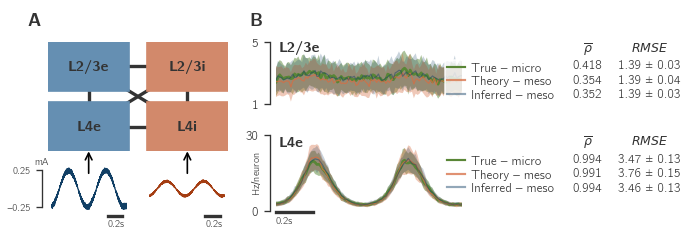

In [46]:
fig = plt.figure(figsize=(textwidth, 0.55*figheight))
gs0 = GridSpec(2,2)
gs1 = GridSpec(2,1)
gs0.set_height_ratios([.5, .2])
gs1.set_height_ratios([.45, .55])  # Make space for ylabel
gs0.update(right=0.4)
gs1.update(left=0.48)

# Legend table formatting
γ = 1.5
γy = 1.2
Δx_in = 1.45   - 0.2    # Offset to avoid overlapping data
Δy_in = 0  *1.15 # Offset to avoid overlapping data
Δy2_in = .01  # Vertical offset to line-up to legend lines
Δx_label_in = -0.18 *1.
Δy_label_in = 0.12
headheight_in = .16 *γy
lineheight_in = .13 *γy
colmargin_in = .15   *γ
colcorrwidth_in = .25 *γ
colrmswidth_in = .25  *γ *2.2

# Population diagram
ax = plt.subplot(gs0[0,:])
plotwidth = 1
plotheight = 1
xmargin = 0
ymargin = 0
xmidmargin = 0.1*plotwidth
ymidmargin = 0.1*plotheight
nrows = 2
ncols = 2
boxwidth = (plotwidth - (ncols-1)*xmidmargin - 2*xmargin) / ncols
boxheight = (plotheight - (nrows-1)*ymidmargin - 2*ymargin) / nrows
x1 = xmargin + boxwidth/2
x2 = plotwidth - x1
y1 = ymargin + boxheight/2
y2 = plotheight - y1
boxes = odict[
    'L2/3e': Box('L2/3e', (x1, y2), boxwidth, boxheight, colours_light[0]),
    'L2/3i': Box('L2/3i', (x2, y2), boxwidth, boxheight, colours_light[1]),
    'L4e': Box('L4e',   (x1, y1), boxwidth, boxheight, colours_light[0]),
    'L4i': Box('L4i',   (x2, y1), boxwidth, boxheight, colours_light[1]),
]
ax.set_xlim(0, plotwidth)
ax.set_ylim(0, plotheight)
ax.set_axis_off()
for box1, box2 in itertools.combinations(boxes.values(), 2):
    line = mpl.patches.mlines.Line2D([box1.center.x, box2.center.x],
                                     [box1.center.y, box2.center.y],
                                      color=lib.black, linewidth=2, zorder=-1)
    ax.add_line(line)
for box in boxes.values():
    draw_neuron_pop(ax, box)
    ax.text(*box.center, box.label, ha='center', va='center', fontweight='bold')
    
popax = ax
    
# Input plots
with mpl.style.context({'font.size': 7.0}):
    s = 10.4 #trainsims.time[0].astype('float64')        # Start of window
    w = 1.0 #trainsims.time[-1] - s   # Width of window
        #dt = w / (len(trainsims.time) - 1)
        #w += dt
    l = 0.2  # Length of scale bar
    h = Ihist.truncate(s, s + w)
    ylim = (-.3, .3)

    ax = plt.subplot(gs0[1,0])
    ax.plot(h.time, h.trace[:,2], color=lib.colours[0])
    ax.set_yticks([-.25, .25])
    ax.set_ylim(ylim)
    ax.text(0,1, "mA", transform=ax.transAxes, ha='right', va='bottom', fontsize=mpl.rcParams['axes.labelsize'])
    ax.spines['left'].set_visible(True)
    ax.spines['right'].set_visible(False)
    ml.plot.draw_xscale(l, '{:0.1f}s'.format(l), ax=ax, xshift=ml.plot.x_to_inches(w-l)*fig.dpi)
    ml.plot.detach_spines(ax, spines='left')
    con = mpl.patches.ConnectionPatch(xyA=(xmargin + boxwidth/2, -.2), coordsA='data', axesA=popax,
                                      xyB=(xmargin + boxwidth/2, 0), coordsB='data', axesB=popax, 
                                      arrowstyle='->')
    ax.add_artist(con);
    
    ax = plt.subplot(gs0[1,1])
    ax.plot(h.time, h.trace[:,3], color=lib.colours[1])
    ax.set_yticks([-.25, .25])
    ax.set_ylim(ylim)
    #ax.yaxis.tick_right()
    ax.yaxis.set_visible(False)
    ax.spines['left'].set_visible(False)
    ml.plot.draw_xscale(l, '{:0.1f}s'.format(l), ax=ax, xshift=ml.plot.x_to_inches(w-l)*fig.dpi)
    ml.plot.detach_spines(ax, spines='right')
    con = mpl.patches.ConnectionPatch(xyA=(plotwidth - xmargin - boxwidth/2, -.2), coordsA='data', axesA=popax,
                                      xyB=(plotwidth - xmargin - boxwidth/2, 0), coordsB='data', axesB=popax, 
                                      arrowstyle='->')
    ax.add_artist(con);
    
# Simulation plots
αs = [0.75, 0.45, 0.75]
legend_order = ['true', 'mesogt', 'map']  # Doesn't set legend order; used for of rms and ρ
ylabelpad = -.1 * fig.dpi

ylim=None
ybounds=None
for k, (α, ylim, _yticks) in enumerate(zip([0,2],
                                           [(1,5), (0,30)],
                                           [(1,5), (0,30)])):

    ax = plt.subplot(gs1[k])
    lib.plot_series_stats(trainsims.ref_sims+trainsims.true.traces, xscalelen=2, xscaleoffset=1, ylim=ylim, ybounds=ybounds,
          idx=α, linecolor=tmicroc[0], shadecolor=tmicroc[0],
          zorder=tmicroz, alpha=tmicroα, ylabelshift=1.3,
          linewidth=1.6,
          label="True – micro")
    lib.plot_series_stats(trainsims.mesogt.traces, xscalelen=2, xscaleoffset=1, ylim=ylim, ybounds=ybounds,
          idx=α, linecolor=tmesoc[0], shadecolor=tmesoc[0],
          zorder=tmesoz, alpha=tmesoα, ylabelshift=1.3,
          label="Theory – meso")
    lib.plot_series_stats(trainsims.map.traces, xscalelen=2, xscaleoffset=1, ylim=ylim, ybounds=ybounds,
          idx=α, linecolor=imesoc[0], shadecolor=imesoc[0],
          zorder=imesoz, alpha=0.7*imesoα, ylabelshift=1.3,
          label="Inferred – meso")
    #ax.plot(trainsims.time, trainsims.Atrue[:,α], alpha=αs[0], label='True – micro')
    #ax.plot(trainsims.time, trainsims.traces['meso-gt'][:,α], alpha=αs[2], label='Theory – meso')
    #ax.plot(trainsims.time, trainsims.traces['map'][:,α], alpha=αs[1], label='Inferred - meso')
    ax.text(.015, .85, popnames[α], transform=ax.transAxes, fontweight='bold')
    #ax.set_xlim(s, s+w)
    ax.set_xlim(s, s+w)
    ax.set_ylim(ylim)
    ax.set_yticks(_yticks)
    if k == 0:
        ax.spines['bottom'].set_visible(False)
        ax.xaxis.set_visible(False)
    else:
        ax.yaxis.set_label_coords(-0.07, 0.5)
        ax.set_ylabel("Hz$/$neuron", fontsize=6.)
        ml.plot.draw_xscale(.2, '0.2s', ax=ax, fontsize=6.)
    ml.plot.detach_spines(ax, spines='left')
    
    # Legend table
    Δx = ml.plot.inches_to_xaxes(Δx_in, ax=ax)
    Δy = ml.plot.inches_to_yaxes(Δy_in, ax=ax)
    Δy2 = ml.plot.inches_to_yaxes(Δy2_in, ax=ax)
    headheight = ml.plot.inches_to_yaxes(headheight_in, ax=ax)
    lineheight = ml.plot.inches_to_yaxes(lineheight_in, ax=ax)
    colmargin = ml.plot.inches_to_xaxes(colmargin_in, ax=ax)
    colcorrwidth = ml.plot.inches_to_xaxes(colcorrwidth_in, ax=ax)
    colrmswidth = ml.plot.inches_to_xaxes(colrmswidth_in, ax=ax)
    #ρvals  = [trainsims.corr[k][α] for k in legend_order]
    ρvals   = [trainbarstats.ρ[k][α] for k in legend_order]
    rmsvals = [trainsims.rms[k][α] for k in legend_order]
    leg = ax.legend(loc='upper right', framealpha=.8, 
                    bbox_to_anchor=(1+Δx, 1-headheight+Δy),
                    borderpad=.2);
    ax.text(1+Δx+colmargin+.5*colcorrwidth, 1+Δy+Δy2, "$\\overline{\\rho}$", transform=ax.transAxes, ha='center', va='top', fontsize=mpl.rcParams['legend.fontsize'])
    ax.text(1+Δx+2*colmargin+colcorrwidth+.5*colrmswidth, 1+Δy+Δy2, "$RMSE$", transform=ax.transAxes, ha='center', va='top', fontsize=mpl.rcParams['legend.fontsize'])
    for k2, (ρ, _rms) in enumerate(zip(ρvals, rmsvals)):
        ax.text(1+Δx+colmargin+colcorrwidth, 1+Δy-headheight-k2*lineheight,
                #"{:.2f} ± {:.2f}".format(ρ[0], ρ[1]),
                "{:.3f}".format(ρ),
                transform=ax.transAxes, ha='right', va='top', fontsize=mpl.rcParams['legend.fontsize'])
        ax.text(1+Δx+2*colmargin+colcorrwidth+colrmswidth, 1+Δy-headheight-k2*lineheight,
                "{:.2f} ± {:.2f}".format(_rms[0], _rms[1]),
                transform=ax.transAxes, ha='right', va='top', fontsize=mpl.rcParams['legend.fontsize'])
        pass
    ml.plot.set_legend_linewidth(1.3, ax=ax)

    if k == 0:
        labelax = ax

gs0.update(top=0.82, bottom=0.1, left=0.07, right=0.33)
gs1.update(top=0.82, bottom=0.1, left=0.4,  right=0.67, hspace=0.45)

Δx_label = ml.plot.inches_to_xaxes(Δx_label_in, ax=popax)
Δy_label = ml.plot.inches_to_yaxes(Δy_label_in, ax=popax)
ml.plot.subreflabel(popax, 'a', inside=False, y=1+Δy_label, x=Δx_label)
Δx_label = ml.plot.inches_to_xaxes(Δx_label_in-0.05, ax=labelax)
Δy_label = ml.plot.inches_to_yaxes(Δy_label_in, ax=labelax)
ml.plot.subreflabel(labelax, 'b', inside=False, y=1+Δy_label, x=Δx_label)

assert(outputname == "Fig7")
if savefig:
    plt.savefig("figures/" + os.path.splitext(outputname)[0] + '.' + saveext.strip('.'))
    
figtrain = fig

In [27]:
data_traces=trainsims.mesogt.traces.traces
ref_traces = trainsims.ref_sims.traces
_corr = np.zeros((len(data_traces), len(ref_traces), *data_traces[0].shape[1:], 2))
_corr[:] = np.nan
for i, (idxd, idxr) in enumerate(itertools.product(range(len(data_traces)), range(len(ref_traces)))):
    L = min(len(data_traces[idxd]), len(ref_traces[idxr]))
    _corr[idxd, idxr] = lib.corr(data_traces[idxd][:L], ref_traces[idxr][:L])

In [28]:
data_traces=trainsims.map.traces.traces
ref_traces = trainsims.ref_sims.traces
_corrI = np.zeros((len(data_traces), len(ref_traces), *data_traces[0].shape[1:], 2))
_corrI[:] = np.nan
for i, (idxd, idxr) in enumerate(itertools.product(range(len(data_traces)), range(len(ref_traces)))):
    L = min(len(data_traces[idxd]), len(ref_traces[idxr]))
    _corrI[idxd, idxr] = lib.corr(data_traces[idxd][:L], ref_traces[idxr][:L])

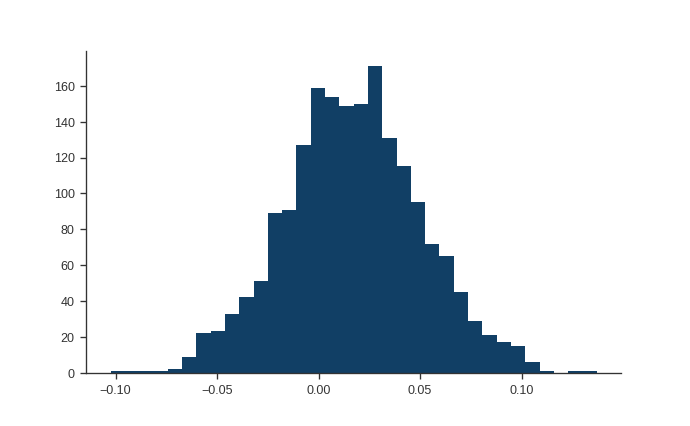

In [29]:
plt.hist(_corr[...,0,0].flat, bins='auto');

In [30]:
_corr[...,0,0].mean(), _corr[...,0,0].std()

(0.017060203657370786, 0.03343050481098857)

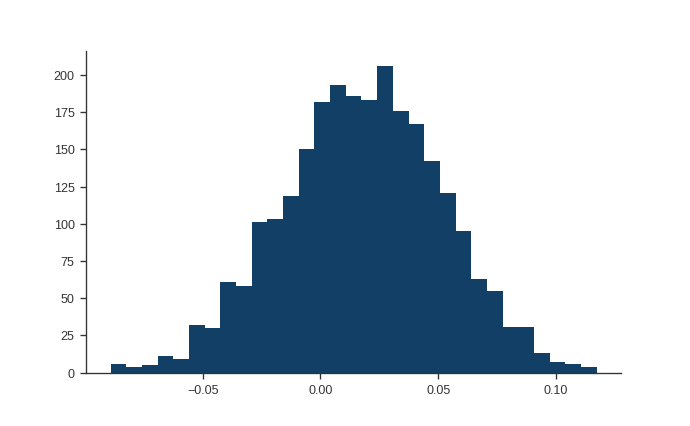

In [31]:
plt.hist(_corrI[...,0,0].flat, bins='auto');

In [32]:
_corrI[...,0,0].mean(), _corrI[...,0,0].std()

(0.017761407879758433, 0.033915023580626855)

### Input parameters

In [33]:
#Iparams = fitcolls['map'].parameters.posterior.input.params
Iparams = train_inferred_meso_records.latest.parameters.input.params

In [34]:
data = np.stack(
    [Iparams.A.amplitude,
     np.tile(Iparams.A.frequency, (4,)),
     np.tile(Iparams.ξ.std, (4,))])
df = pd.DataFrame(data,
                  index=["$B$", "$ω$", "$q$"],
                  columns=["L2/3e", "L2/3i", "L4e", "L4i"])
df

,L2/3e,L2/3i,L4e,L4i
$B$,0.0,0.0,0.25,0.1
$ω$,2.0,2.0,2.00,2.0
$q$,4.0,4.0,4.00,4.0


In [35]:
table_input_params_training = df.to_latex()
if __name__ == "__main__":
    print(table_input_params_training)

\begin{tabular}{lrrrr}
\toprule
{} &  L2/3e &  L2/3i &   L4e &  L4i \\
\midrule
\$B\$ &    0.0 &    0.0 &  0.25 &  0.1 \\
\$ω\$ &    2.0 &    2.0 &  2.00 &  2.0 \\
\$q\$ &    4.0 &    4.0 &  4.00 &  4.0 \\
\bottomrule
\end{tabular}



## Fig 8

In [36]:
outputname = "Fig8"

In [37]:
Ipset = ParameterSet({
      'type'  : "Series",
      'dir'   : "inputs",
      'params': OUtest_Iparams,
      'name'  : ""})
OUIhist = core.load(Ipset)

Ipset.params = test_Iparams
rampIhist = core.load(Ipset)

#Ipset.params = easyOUtest_Iparams
#easyOUIhist = core.load(Ipset)

In [38]:
ylim_input = {rampsims: (-0.6, 0.6),
               OUsims: (-.5, 2.3)}
yticks_input = {rampsims: (-0.5, 0.5),
                OUsims: (-0.2, 0.5)}
yheights_dict = {#rampsims: [14, 27, 105, 65],
                 rampsims: [12, 25, 80, 36],
                 #OUsims: [5, 12, 16, 35],
                 OUsims: [5, 12, 16, 32],
                 easyOUsims: [8, 18, 24, 45]}
yshorten_dict = {rampsims: 0.07,
                 OUsims: 0}
wlarge_dict = {rampsims: (13, 16),
               #OUsims: (12, 13.5)}
               OUsims: (16, 19)}
wsmall_dict = {rampsims: (15.3, 15.7) - np.array(1),
               #OUsims: (12.5, 12.9)}
               OUsims: (17.25, 18.4)}
yticks_dict = {rampsims: [(0, 8), (0, 20), (0, 60), (0, 34)],
               OUsims: [(0, 5), (0, 10), (0, 15), (0, 30)]}

    for d in [ylim_input, yticks_input, yheights_dict, yshorten_dict, wlarge_dict, wsmall_dict, yticks_dict]:
        if easyOUsims not in d:
            d[easyOUsims] = d[OUsims]


In [57]:
imesoα=.6
tmesoα=.6
insetlinewidth=1.4

In [60]:
def plot_4pop_test(fig, Ihist, sims, side):
    
    shape = (len(popnames),1)
    Ishape = (2,-(-len(popnames)//2))
    pops = range(len(popnames))
    αnames = popnames
    legend_order = ['true', 'meso-gt', 'map']  # Doesn't set legend order; used for of rms and ρ
    midmargin_in = 0.05
    leftmargin_in = {'left': 0.3, 'right': textwidth/2 + 0*midmargin_in}[side]
    rightmargin_in = {'right':0.3, 'left': textwidth/2 + 0*midmargin_in}[side]
    #rightmargin_in = .98  # Make space for wide legend
    bottommargin_in = 0.025
    vmidmargin_in = 0.15
    #topmargin_in = 0.025
    topmargin_in = .26
    #ylabelpad = -.1 * fig.dpi
    ylabelpad = 0

    wlarge = wlarge_dict[sims]
    wsmall = wsmall_dict[sims]

    labelaxes = {}

    # Legend table formatting
    Δx_in = .45  # Offset to avoid overlapping data
    Δy_in = .01  # Vertical offset to line-up to legend lines
    headheight_in = .16
    lineheight_in = .13
    colmargin_in = .1
    colcorrwidth_in = .25
    colrmswidth_in = .25

    #s = yshorten_dict[sims]
    s = 0
    yheights = yheights_dict[sims]
    ylims  = [(0-s*yh, yh) for yh in yheights]
    yheightssmall = [-sub(*ylim) for ylim in ylims]
    ylimssmall = [(ylim[0]+s*yh, ylim[1]-s*yh) for ylim, yh in zip(ylims, yheightssmall)]
    yticks = yticks_dict[sims]
    αs = {'true': 0.75, 'meso-gt': 0.52, 'map': 0.52}

    #######
    # Input traces
    gs00 = GridSpec(*Ishape)
    _left = {'left':0., 'right':0.55}[side]
    _right = {'left':0.45, 'right': 1}[side]
    gs00.update(left=_left, right=_right)
    axes = np.array([fig.add_subplot(gs00[i]) for i in range(np.prod(Ishape))]).reshape(Ishape)
    label = {'left':'a', 'right':'c'}[side]
    labelaxes[label] = axes.flat[0]

    ylim = ylim_input[sims]
    _yticks = yticks_input[sims]
    Ihist = Ihist.truncate(float(wlarge[0]), float(wlarge[1]))
    for α, name, ax, c in zip(pops, αnames, axes.flat, lib.colours):
        plt.sca(ax)
        ax.plot(Ihist.time, Ihist.trace[:,α], c=c)
        ax.set_xlim(wlarge)
        ax.set_ylim(ylim)
        ax.set_yticks(_yticks)
        if α == 2:
            ml.plot.detach_spines(ax, spines='left')
            lib.draw_xscale(1, "1 s", yshift=0, xshift=0, offset=0, scalelinewidth=1.3)
            yl = {OUsims:2, rampsims:1, easyOUsims:2}[sims]
            ml.plot.draw_yscale(yl, "{} mA".format(yl), xshift=4, yshift=-60, scalelinewidth=1.3)
            # Shift x label down a little
            x, y = ax.xaxis.label.get_position()
            _Δy = 0.1 * np.diff(ax.get_ylim())[0]
            ax.xaxis.set_label_coords(x, y-_Δy, transform=ax.transData)
            # Shift y label left a little
            x, y = ax.yaxis.label.get_position()
            _Δx = 0.035 * np.diff(ax.get_xlim())[0]
            ax.yaxis.set_label_coords(x-_Δx, y, transform=ax.transData)
            #ax.set_ylabel("$I(t)$", labelpad=1.5*ylabelpad)
            #ax.text(-0, 1.15, "mA", ha='right', va='top', fontsize=mpl.rcParams['axes.labelsize'], transform=ax.transAxes)
            #ax.text(0., 1.15, "mA", ha='right', va='top', transform=ax.transAxes)
        else:
            ax.xaxis.set_visible(False)
            ax.yaxis.set_visible(False)
            ax.spines['bottom'].set_visible(False)
            ax.spines['left'].set_visible(False)
        ax.text(.05, 1, name, ha='left', va='bottom', color=c, transform=ax.transAxes)

    #_leftmargin_in = leftmargin_in - {'left': 0.05, 'right': 0.2}[side]
    #_rightmargin_in = rightmargin_in - {'right': 0.05, 'left': 0.2}[side]
    #leftmargin = ml.plot.inches_to_xaxes(_leftmargin_in/Ishape[1], ax)
    #rightmargin = ml.plot.inches_to_xaxes(_rightmargin_in/Ishape[1], ax)
    left, right = {'left': (.085, .45),
                   'right': (.585, .98)}[side]
    gs00.update(bottom=.78, left=left, right=right, top=.9, hspace=.3, wspace=.15)

    #######
    # Large window
    gs0 = GridSpec(*shape)
    gs0.update(top=.75)
    axes = np.array([fig.add_subplot(gs0[i]) for i in range(np.prod(shape))]).reshape(shape)
    label = {'left':'b', 'right':'d'}[side]
    labelaxes[label] = axes.flat[0]

    for α, name, ax, ylim, _yticks, ylimsmall, yh in zip(pops, αnames, axes.flat, ylims, yticks, ylimssmall, yheightssmall):
        plt.sca(ax)
        lib.plot_series_stats(sims.ref_sims+sims.true.traces, xscalelen=2, xscaleoffset=1, ylim=ylim, ybounds=_yticks,
          idx=α, linecolor=tmicroc[0], shadecolor=tmicrocshade[0], linewidth=None,
          zorder=tmicroz, alpha=tmicroα, ylabelshift=1.3,
          label="True – micro")
        lib.plot_series_stats(sims.mesogt.traces, xscalelen=2, xscaleoffset=1, ylim=ylim, ybounds=_yticks,
              idx=α, linecolor=tmesoc[0], shadecolor=tmesocshade[0],
              zorder=tmesoz, alpha=tmesoα, ylabelshift=1.3,
              label="Theory – meso")
        lib.plot_series_stats(sims.map.traces, xscalelen=2, xscaleoffset=1, ylim=ylim, ybounds=_yticks,
              idx=α, linecolor=imesoc[0], shadecolor=imesocshade[0],
              zorder=imesoz, alpha=imesoα, ylabelshift=1.3,
              label="Inferred – meso")
        #ax.plot(sims.time, sims.Atrue[:,α], alpha=αs['true']**2, zorder=-1, label='micro - true')
        #ax.plot(sims.time, sims.traces['meso-gt'][:,α], alpha=αs['meso-gt']**2, label='meso - theory')
        #ax.plot(sims.time, sims.traces['map'][:,α], alpha=αs['map']**2, label='meso - MAP')
        ax.text(.05, .85, name, transform=ax.transAxes, fontweight='bold', backgroundcolor='#FFFFFF88')
        ax.set_xlim(wlarge)
        ax.set_xticks(wlarge)  # Just to avoid 'detach_spines' from complaining
        ax.set_ylim(ylim)
        ax.set_yticks(_yticks)
        ml.plot.detach_spines(ax)
        if ax in axes[-1,:]:
            ml.plot.draw_xscale(1, '1s', ax=ax, yshift=5)
            #ax.set_ylabel("$a(t)$\n(Hz$/$neuron)", labelpad=ylabelpad)
            if side in ('left', 'right'):
                ax.set_ylabel("$A(t)$\nHz$/$neuron", labelpad=ylabelpad)
                ax_ylabel = ax
        else:
            ax.xaxis.set_visible(False)
            ax.spines['bottom'].set_visible(False)
            ax.set_ylabel("")
        rect = mpl.patches.Rectangle((wsmall[0], ylimsmall[0]), -sub(*wsmall), (1-2*s)*yh, ec=lib.black, fc=None)
        ax.add_patch(rect)

    #ax = axes[0,1]
    #leg = ax.legend(loc='upper right', framealpha=.8);
    #ml.plot.set_legend_linewidth(1.5, legend=leg)

    leftmargin = ml.plot.inches_to_xaxes(leftmargin_in, ax)
    midmargin = ml.plot.inches_to_xaxes(midmargin_in, ax)
    rightmargin = ml.plot.inches_to_xaxes(rightmargin_in, ax)
    bottommargin = ml.plot.inches_to_yaxes(bottommargin_in, ax)
    topmargin = ml.plot.inches_to_yaxes(topmargin_in, ax)
    vmidmargin = ml.plot.inches_to_yaxes(vmidmargin_in, ax)
    midline = (1-rightmargin-leftmargin) / 2 + leftmargin

    left, right = {'left': (.085, .24),
                   'right': (.585, .74)}[side]
    gs0.update(left=left, right=right, top=1-topmargin, bottom=bottommargin, hspace=vmidmargin)
    legendaxes = axes
    
    ax_ylabel.yaxis.set_label_coords(-0.14, 0.5)
    
    #######
    # Small window
    left, right = {'left': (.26, .45),
                   'right': (.76+.015/2, .98)}[side]
    gs1 = GridSpec(*shape,
                   left=left, right=right, top=1-topmargin, bottom=bottommargin, hspace=.01)

    with mpl.style.context({'lines.linewidth': 1.2}):
        axes = np.array([fig.add_subplot(gs1[i]) for i in range(np.prod(shape))]).reshape(shape)

    for α, name, ax, ylim, _yticks in zip(pops, αnames, axes.flat, ylimssmall, yticks):
        plt.sca(ax)
        lib.plot_series_stats(sims.ref_sims+sims.true.traces, xscalelen=2, xscaleoffset=1, ylim=ylim, ybounds=_yticks,
          idx=α, linecolor=tmicroc[0], shadecolor=tmicrocshade[0],
          zorder=tmicroz, alpha=tmicroα, ylabelshift=1.3, linewidth=insetlinewidth,
          label="True – micro")
        lib.plot_series_stats(sims.mesogt.traces, xscalelen=2, xscaleoffset=1, ylim=ylim, ybounds=_yticks,
              idx=α, linecolor=tmesoc[0], shadecolor=tmesocshade[0], linewidth=0.9*insetlinewidth,
              zorder=tmesoz, alpha=tmesoα, ylabelshift=1.3,
              label="Theory – meso")
        lib.plot_series_stats(sims.map.traces, xscalelen=2, xscaleoffset=1, ylim=ylim, ybounds=_yticks,
              idx=α, linecolor=imesoc[0], shadecolor=imesocshade[0], linewidth=0.9*insetlinewidth,
              zorder=imesoz, alpha=imesoα, ylabelshift=1.3,
              label="Inferred – meso")
        #ax.plot(sims.time, sims.Atrue[:,α], alpha=αs['true'], zorder=1, label='True - micro')
        #ax.plot(sims.time, sims.traces['meso-gt'][:,α], alpha=αs['meso-gt'], zorder=2, label='Theory - meso')
        #ax.plot(sims.time, sims.traces['map'][:,α], alpha=αs['map'], zorder=0, label='Inferred – meso')
        #ax.text(.01, .85, name, transform=ax.transAxes, fontweight='bold')
        ax.set_xlim(wsmall)
        ax.set_ylim(ylim)
        #ax.set_yticks(_yticks)
        ax.spines['left'].set_visible(False)
        ax.yaxis.set_visible(False)
        if ax in axes[-1,:]:
            ml.plot.draw_xscale(0.1, '0.1s', ax=ax, yshift=5)
        else:
            ax.xaxis.set_visible(False)
            ax.spines['bottom'].set_visible(False)
        #ml.plot.detach_spines(ax)

    return labelaxes, legendaxes
    

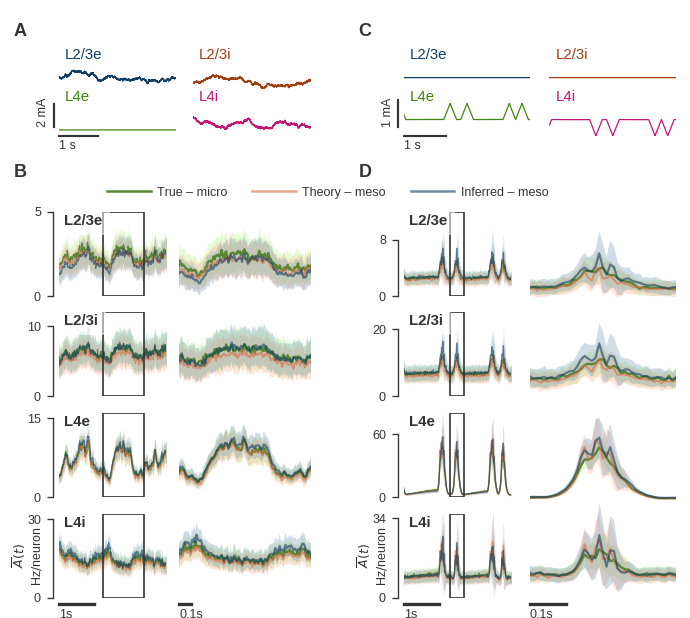

In [61]:
fig = plt.figure(figsize=(textwidth, 1.45*figheight))
gs = GridSpec(1, 2)

labelaxes, legendaxes = plot_4pop_test(fig, OUIhist, OUsims, side='left')
labelaxes_right, _ = plot_4pop_test(fig, rampIhist, rampsims, side='right')
#######
# Subref labels
assert set(labelaxes).intersection(labelaxes_right) == set()
labelaxes.update(labelaxes_right)
for lbl, ax in labelaxes.items():
    if lbl in ('a', 'b'): _x = -.4
    else: _x = -.4
    x = ml.plot.inches_to_xaxes(_x, ax=ax)
    y = ml.plot.inches_to_yaxes(.2, ax=ax)
    if lbl in ('a','c') : y *= 1.1
    if lbl in ('b','d') : y *= 1.4
    ml.plot.subreflabel(ax, lbl, inside=False, x=x, y=1+y)
    
# Legend
leg = legendaxes[0,0].legend(loc='upper left', ncol=3, bbox_to_anchor=(0.45,1.3),
                             handlelength=3.5, labelspacing=1.3)
ml.plot.set_legend_linewidth(1.5, legend=leg)

assert(outputname == "Fig8")
if savefig:
    #plt.savefig("/home/alex/tmp/fig8.png")
    plt.savefig("figures/" + os.path.splitext(outputname)[0] + '.' + saveext.strip('.'))
    
figtest = fig

Bar statistics

In [ ]:
legend_order = ['true', 'mesogt', 'map']
popnames = ['L2/3e', 'L2/3i', 'L4e', 'L4i']
def unroll(stats):
    stats = odict['$\\overline{ρ}$': stats.ρ, '$\\overline{\\mathrm{RMSE}}$': stats.rmse]
    return odict( ((s,m,n), stat[m][j])
            for s, stat in stats.items()
            for m in legend_order
            for j, n in enumerate(popnames))
data = odict[
    'Sine input': unroll(trainbarstats),
    'OU input': unroll(OUbarstats),
    'Impulse input': unroll(rampbarstats)
]

In [ ]:
index = pd.MultiIndex(levels=[['Sine input', 'OU input', 'Impulse input'], ['true', 'mesogt', 'map']],
                      labels=[[0, 0, 0, 1, 1, 1, 2, 2, 2], [0, 1, 2, 0, 1, 2, 0, 1, 2]])

In [ ]:
df_bar_performance = pd.DataFrame(data)
df_bar_performance = df_bar_performance.unstack(0).unstack(1).stack(0).swaplevel().sort_index()
df_bar_performance = df_bar_performance.reindex(index)
df_bar_performance

In [ ]:
df_bar_performance.to_latex(escape=False)

In [ ]:
def _format(x):
    if hasattr(x, '__len__') and len(x) == 2:
        return '{:.2f} \\pm {:.2f}'.format(x[0], x[1])
    else:
        return '{:.3f}'.format(x)

In [ ]:
#_format(x):
#    return '{:.3f}'.format(x)
f = {c: _format for c in df_bar_performance.columns}
table_bar_performance = df_bar_performance.to_latex(formatters=f, escape=False)
if __name__ == "__main__":
    print(table_bar_performance)

Trial statistics

In [ ]:
legend_order = ['true', 'mesogt', 'map']
popnames = ['L2/3e', 'L2/3i', 'L4e', 'L4i']
def unroll(sim):
    stats = odict['ρ': sim.corr, 'RMSE': sim.rms]
    return odict( ((s,m,n), stat[m][j])
            for s, stat in stats.items()
            for m in legend_order
            for j, n in enumerate(popnames))
data = odict[
    'Sine input': unroll(trainsims),
    'OU input': unroll(OUsims),
    'Impulse input': unroll(rampsims)
]

In [ ]:
index = pd.MultiIndex(levels=[['Sine input', 'OU input', 'Impulse input'], ['true', 'mesogt', 'map']],
                      labels=[[0, 0, 0, 1, 1, 1, 2, 2, 2], [0, 1, 2, 0, 1, 2, 0, 1, 2]])

In [ ]:
df = pd.DataFrame(data)
df = df.unstack(0).unstack(1).stack(0).swaplevel().sort_index()
df = df.reindex(index)
df

In [ ]:
#def _format(x):
#    return '{:.3f} ± {:.3f}'.format(x[0], x[1])
f = {c: _format for c in df.columns}
table_performance = df.to_latex(formatters=f)
if __name__ == "__main__":
    print(table_performance)

In [ ]:
df_mixed_perf = pd.concat({r'$\RMSE$': df['RMSE'], r'$\bar{ρ}$': df_bar_performance[r'$\overline{ρ}$']}, axis=1)
df_mixed_perf = df_mixed_perf[[r'$\RMSE$', r'$\bar{ρ}$']]  # Reorder
df_mixed_perf

In [ ]:
df_mixed_perf.columns = \
    pd.MultiIndex(levels = [[r'$\RMSE$', r'$\bar{ρ}$'],
                            ['{L2/3e}', '{L2/3i}', '{L4e}', '{L4i}']],
                  labels = df_mixed_perf.columns.labels)

df_mixed_perf = df_mixed_perf \
    .set_index(
        pd.MultiIndex(levels = [['Sine', 'OU', 'Impulse'],
                                [r'\cc{True} -- micro', r'\cc{Theory} -- meso', r'\cc{MAP} -- meso']],
                      labels = df_mixed_perf.index.labels,
                      names  = ['Input', 'Model'])
    )
df_mixed_perf

In [ ]:
f = {c: _format for c in df_mixed_perf.columns}
table_mixed_performance_1 = df_mixed_perf[[r'$\RMSE$']].to_latex(formatters=f, escape=False,
                                                   column_format='llSSSSSSSS')
if __name__ == "__main__":
    print(table_mixed_performance_1)

In [ ]:
f = {c: _format for c in df_mixed_perf.columns}
table_mixed_performance_2 = df_mixed_perf[[r'$\bar{ρ}$']].to_latex(formatters=f, escape=False,
                                                   column_format='llSSSSSSSS')
if __name__ == "__main__":
    print(table_mixed_performance_2)

### Log likelihood of different models

**NOTE** This section needs to be updated before it can run properly again

In [ ]:
def logL(sims, model, N, dt):
    A = sims.Atrue_actual
    a = sims.traces[model]
    n = A*N*dt
    p = sinn.clip_probabilities(a*dt)
    return ( -shim.gammaln(n+1) - shim.gammaln(N-n+1)
             + n*shim.log(p)
             + (N-n)*shim.log(1-p)
            ).sum()

In [ ]:
#N = np.array(fitcolls['map'].parameters.posterior.model.params.N)
N = train_true_micro_records.latest.parameters.model.N
dt = 0.001  # Hardcoded in FitResultSimes

    logL(OUsims, 'meso-gt', N, dt) - logL(OUsims, 'map', N, dt)

    logL(rampsims, 'meso-gt', N, dt) - logL(rampsims, 'map', N, dt)

    ylims = [(0, 5), (0, 12), (0, 16), (0, 35)]
    k=0
    n = 1
    for k, ylim in zip(range(4), ylims):
        plt.subplot(4,1,k+1)
        plt.plot(anlz.subsample(OUsims.time, n), anlz.subsample(OUsims.Atrue[:,k], n));
        plt.plot(anlz.subsample(OUsims.time, n), anlz.subsample(OUsims.traces['map'][:,k], n));
        plt.plot(anlz.subsample(OUsims.time, n), anlz.subsample(OUsims.traces['meso-gt'][:,k], n));
        plt.ylim(ylim);

# Model parameters

This section uses an `__name__` guard to avoid it being computed when the notebook is run from another with `run_notebook()`.

TODO: It would probably make more sense to move this to the *fit-traces* notebook.

In [ ]:
fitrecords = lib.RecordSet('20181107-110946', '20181113-091205', '20190612-125539')
fitcoll = lib.FitCollView(
        list(fitrecords.filter.script('gradient_descent')
                              .extract("parameters", "outputpath")))
len(fitcoll)

In [ ]:
def expand_vals(vals, mask):
    vs = {}
    for k, m in mask.items():
        if not np.any(m):
            continue
        v = np.tile(np.array(None), m.shape)
        j = 0
        for i, mval in enumerate(m.flat):
            if mval:
                v.flat[i] = vals[k].flat[j]
                j += 1
            elif vals[k].size == m.size:
                # Continue incrementing value counter
                j += 1
        vs[k] = v
    return vs

In [ ]:
def expand_mask(mask, shapes):
    """
    mask: dict (bool). Mask for each parameter.
    shapes: dict (tuples). Shape of each parameter.
    """
    _mask = {}
    for k, m in mask.items():
        shape = shapes[k]
        m = np.atleast_1d(m)
        if len(shape) < m.ndim:
            m = m.squeeze()  # B/c 2D kernels
        assert(m.ndim <= len(shape))
        for i in range(1, len(shape)+1):
            if i > m.ndim:
                break
            elif m.shape[-i] > 1:
                assert m.shape[-i] == shape[-i]
        _mask[k] = np.broadcast_to(m, shape)
    return _mask

In [ ]:
def valformat(f):
    if f is None:
        return " — "
    else:
        return "{:.3f}".format(f)
FitData = namedtuple('FitData', ['varstrings', 'values'])

In [ ]:
def format_table_data(vals, valformat):
    data = []
    for var in table_vars:
        val = vals[var]
        if var != 'w':
            varstring = '${}$'.format(var)
            valrow = [valformat(v) for v in val]
            data.append( FitData(varstring, valrow) )
        else:
            for α, row in zip(popnames, val):
                vs = '$w_{{ {}\\leftarrow \\cdot}}$'.format(α)
                valrow = [valformat(v) for v in row]
                data.append( FitData(vs, valrow) )
    return data

In [ ]:
example_fitrecord = records.filter.label('20190612-125539').latest

mask = ml.parameters.params_to_arrays(fitcoll.parameters.posterior.mask)

true_pset = ml.parameters.params_to_arrays(fitcoll.parameters.posterior.data.params.model)

shapes = {k: true_pset[k].shape for k in mask}

mask = expand_mask(mask, shapes)

fitdata  = format_table_data(expand_vals(fitcoll.result, mask), valformat)
truedata = format_table_data(expand_vals(true_pset, mask), valformat)

In [ ]:
latexstrs = []
latexstrs += [r"  \begin{tabular}{lrrrr|rrrr}"]
latexstrs += ["          & \\multicolumn{{ {} }}{{c}}{{MAP}} & \multicolumn{{ {} }}{{c}}{{Theory}}".format(len(popnames),len(popnames))
              + r"\\ \cline{2-5} \cline{6-9}"]
latexstrs += ["          & "
              + " & ".join(['${}$'.format(α) for α in popnames])
              + " & " + " & ".join(['${}$'.format(α) for α in popnames])
              + r" \\ \hline"]
for fd, td in zip(fitdata, truedata):
    assert(fd.varstrings == td.varstrings)
    latexstrs += ["    " + fd.varstrings
                  + " & " + " & ".join(fd.values)
                  + " & " + " & ".join(td.values)
                  + r" \\"]
latexstrs += [r"  \end{tabular}"]
table_inferred_params = '\n'.join(latexstrs)

In [ ]:
if __name__ == "__main__":
    print(table_inferred_params)

In [ ]:
colidx = pd.MultiIndex.from_tuples([(src, '$'+α+'$')
                                    for src in ('inferred', 'ground truth')
                                    for α in popnames])
pd.DataFrame([fd.values + td.values for fd, td in zip(fitdata, truedata)],
             index=[fd.varstrings for fd in fitdata],
             columns=colidx)